### Pivot Table
    엑셀에서 pivot table 기능이 있는것처럼, 
    Pandas에서도 이와 유사한 pivot_table함수를 제공한다.
    
    분석을 하다 보면 원본 데이터의 구조가 분석 기법에 맞지 않아서 
    행과 열의 위치를 바꾼다거나, 특정 요인에 따라 집계를 해서 구조를 
    바꿔주어야 하는 경우가 종종 발생하는데 이때 피봇함수를 이용해서
    분석에 알맞는 구조로 데이타를 변경해서 사용한다.

    피봇함수은 DataFrame의 데이타를 Reshape 하는 방법중 하나이다.
    
    여러 컬럼을 index, values, columns 값으로 사용가능하다.
    그룹연산과 함께 사용

#### Reshaping Data By Pivoting( 데이타의 재구조화 )

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9062546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}

df1 = DataFrame(data)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9062546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [4]:
df1.pivot_table?

In [13]:
#index, columns, values 매개변수...키워드 매개변수
df1.pivot_table(index=['도시'],columns=['연도'],values=['인구'])
#df1.pivot_table(index=['도시'],columns=['연도'],'인구')
df1.pivot_table('인구',index=['도시'],columns=['연도'])
df1.pivot_table('인구','도시','연도', margins=True)

연도,2005,2010,2015,All
도시,,,,
부산,3512547.0,3393191.0,3448737.0,3.451492e+06
서울,9062546.0,9631482.0,9904312.0,9.532780e+06
인천,NaN,263203.0,2890451.0,1.576827e+06
All,6287546.5,4429292.0,5414500.0,5.263309e+06


In [14]:
df1['인구'].mean()

5263308.625

In [18]:
df1.pivot_table('인구', index=['연도','도시'])
#df1.groupby('인구')?  ---> 그룹바이 이용해서 같은 결과 내기
#tipdf.groupby('sex')[[''연도','도시']]?

인구
연도   도시         
2005 부산  3512547
     서울  9062546
2010 부산  3393191
     서울  9631482
     인천   263203
2015 부산  3448737
     서울  9904312
     인천  2890451

## 실전데이터

In [23]:
tipdf= pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [26]:
'''
해당 데이터 분석의 목표는 식사 총대금 대비 팁의 비율이 어떤 경우에 가장 높은지 찾는 것이다.
우선 식사대금과 팁의 비율을 나타내는 tip_pct컬럼을 하나 추가하자
'''
tipdf['tip_pct'] = round(tipdf['tip']/tipdf['total_bill'],2)
tipdf.tail()

tipdf.dropna(inplace=True)
tipdf.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3.0,0.20
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,0.07
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,0.09
242,17.82,1.75,Male,No,Sat,Dinner,2.0,0.10
243,18.78,3.00,Female,No,Thur,Dinner,2.0,0.16


In [27]:
#1. tipdf에서 day 기준으로 그룹핑---index, columns, values? -->index
tipdf.pivot_table(index='day', aggfunc='mean').round(2)



,size,tip,tip_pct,total_bill
day,,,,
Fri,2.11,2.73,0.17,17.15
Sat,2.52,2.99,0.15,20.44
Sun,2.84,3.26,0.17,21.41
Thur,2.45,2.77,0.16,17.68


In [29]:
# 2. tipdf에서 성별, 흡연여부별 그룹핑...pivot_table()...소수점 2자리
tipdf.pivot_table(index=['sex','smoker']).round(2)

size   tip  tip_pct  total_bill
sex    smoker                                 
Female No      2.59  2.77     0.16       18.11
       Yes     2.24  2.93     0.18       17.98
Male   No      2.71  3.11     0.16       19.79
       Yes     2.50  3.05     0.15       22.28

In [30]:
'''
pivot_table(속성)
values : 채우고자 하는 값
index : 그룹핑 기준
columns : 컬럼값
'''
tipdf.pivot_table(values=['total_bill', 'tip'],
                  index =['sex','day'],
                  columns='smoker')


tip           total_bill           
smoker             No       Yes         No        Yes
sex    day                                           
Female Fri   3.125000  2.682857  19.365000  12.654286
       Sat   2.724615  2.868667  19.003846  20.266667
       Sun   3.329286  3.500000  20.824286  16.540000
       Thur  2.459600  2.990000  16.014400  19.218571
Male   Fri   2.500000  2.741250  17.475000  20.452500
       Sat   3.256563  2.879259  19.929063  21.837778
       Sun   3.115349  3.521333  20.403256  26.141333
       Thur  2.941500  3.058000  18.486500  19.171000

In [32]:
tipdf.pivot_table('tip','sex','smoker',aggfunc='count', margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [36]:
## 문제1. 성별에 따른 평균 팁비율

tipdf.pivot_table('tip_pct','sex',aggfunc='mean')

,tip_pct
sex,
Female,0.166552
Male,0.157834


In [37]:
## 문제 1과 동일한 결과가 나오도록 groupby()를 사용하세요.

tipdf.groupby('sex')[['tip_pct']].mean()


,tip_pct
sex,
Female,0.166552
Male,0.157834


In [38]:
tipdf.pivot_table('tip_pct', index=['sex', 'smoker'])

tip_pct
sex    smoker          
Female No      0.156852
       Yes     0.182424
Male   No      0.161031
       Yes     0.152667

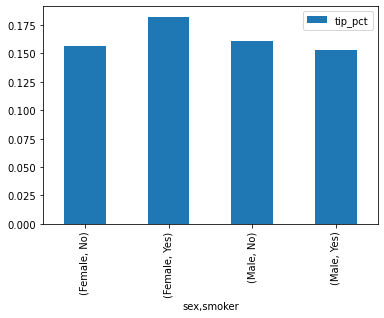

In [39]:
tipdf.pivot_table('tip_pct', index=['sex', 'smoker']).plot(kind='bar')
plt.show()

In [46]:
'''
여성, 남성 | 흡연자, 비흡연자
각 그룹에서 가장 많은 팁과 가장 작은 팁의 차이를 알고 싶다...
어디서 팁을 주는 격차가 더 많이 벌어지는지....
사용자 정의 함수를 만들고 
agg()/apply() 함수에서 작용한다.

'''

def max_min_tip(x):
        return x.max() - x.min()
    
tipdf.groupby(['sex', 'smoker'])[['tip']].agg(max_min_tip)



tip
sex    smoker      
Female No      4.20
       Yes     5.50
Male   No      7.75
       Yes     9.00